In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/turkish-soil-dataset-crystalline/turkish soil dataset crystalline.xlsx


In [2]:
# Blocking the future warnings
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/turkish-soil-dataset-crystalline/turkish soil dataset crystalline.xlsx


In [4]:
xls = pd.ExcelFile("/kaggle/input/turkish-soil-dataset-crystalline/turkish soil dataset crystalline.xlsx")
print(xls.sheet_names)
df = xls.parse(xls.sheet_names[0])  # or replace with the correct sheet name

['Sheet1']


In [5]:
df = pd.read_excel("/kaggle/input/turkish-soil-dataset-crystalline/turkish soil dataset crystalline.xlsx", sheet_name='Sheet1')
df.head()

,sample,LS/ES,References,SiO2,TiO2,Al2O3,Cr2O3,FeO,MnO,MgO,...,Er,Tm,Yb,Lu,Hf,Th,U,Os,LOI,Region
0,Chang'E 5 Li soil mare,LS,NaN,42.2,5.00,11.0,0,22.5,0.28,6.48,...,0.00000,0.000080,0.000949,0.000141,0.001360,0.000472,0.000141,NaN,NaN,Mare
1,CE-5 soil [Zong] Northern Oceanus Procellarummare,LS,NaN,41.3,5.12,11.6,0,22.7,0.28,6.25,...,0.00113,0.000157,0.000990,0.000136,0.001400,0.000514,0.000135,NaN,NaN,Mare
2,CE-5 soil [This study] Northern Oceanus Procel...,LS,NaN,41.5,5.09,11.4,0,22.7,0.28,6.30,...,0.00113,0.000157,0.000990,0.000136,0.001400,0.000514,0.000135,NaN,NaN,Mare
3,CE-5 BASALT FRAGMENTS[TIAN] mare,LS,NaN,42.1,5.70,11.6,0.2,22.2,0.30,5.80,...,0.00104,NaN,0.000920,0.000130,0.001325,0.000450,NaN,NaN,NaN,Mare
4,CE-5 BASALT FRAGMENTS[Su] mare,LS,NaN,42.0,5.50,13.2,0.2,22.1,0.30,4.40,...,NaN,NaN,0.000942,0.000131,0.001352,0.000480,NaN,NaN,NaN,Mare


In [6]:
df.describe()

,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,FE2O3,...,Dy,Ho,Er,Tm,Yb,Lu,Hf,Th,Os,LOI
count,216.000000,215.000000,216.000000,216.000000,216.000000,216.000000,216.000000,215.000000,214.000000,4.000000,...,180.000000,179.000000,60.000000,48.000000,180.000000,180.000000,180.000000,180.000000,4.000000e+00,1.0
mean,44.619203,3.306833,17.168417,12.471581,0.177819,8.645075,11.739384,0.685158,0.256329,17.837500,...,0.001523,0.000344,0.000924,0.000146,0.000836,0.000116,0.000887,0.000378,1.094750e-06,10000.0
std,3.955984,4.354206,5.922691,5.618002,0.090715,3.325526,2.465082,0.771730,0.258377,13.277134,...,0.001049,0.000207,0.000647,0.000104,0.000590,0.000079,0.000661,0.000388,8.940788e-07,NaN
min,1.970000,0.260000,0.990000,2.960000,0.000000,0.255000,0.159000,0.050000,0.010000,9.850000,...,0.000250,0.000050,0.000000,0.000030,0.000133,0.000018,0.000100,0.000040,1.790000e-07,10000.0
25%,42.395750,1.220000,12.850000,8.530000,0.120000,6.400000,10.700000,0.396500,0.105000,11.312500,...,0.000814,0.000196,0.000490,0.000067,0.000478,0.000070,0.000470,0.000141,4.947500e-07,10000.0
50%,45.105000,1.910000,16.100000,11.525000,0.173000,9.100000,11.275000,0.450000,0.160000,11.900000,...,0.001234,0.000293,0.000788,0.000148,0.000670,0.000093,0.000660,0.000240,1.000000e-06,10000.0
75%,46.610000,5.000000,20.600000,16.350000,0.220125,10.000000,12.418125,0.565000,0.268750,18.425000,...,0.002008,0.000406,0.001152,0.000163,0.000949,0.000133,0.001238,0.000480,1.600000e-06,10000.0
max,50.700000,53.400000,32.740000,35.270000,0.700000,41.800000,19.170000,3.950000,2.600000,37.700000,...,0.006100,0.001230,0.003390,0.000487,0.003050,0.000422,0.003630,0.001820,2.200000e-06,10000.0


In [7]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sample      216 non-null    object 
 1   LS/ES       216 non-null    object 
 2   References  123 non-null    object 
 3   SiO2        216 non-null    float64
 4   TiO2        215 non-null    float64
 5   Al2O3       216 non-null    float64
 6   Cr2O3       82 non-null     object 
 7   FeO         216 non-null    float64
 8   MnO         216 non-null    float64
 9   MgO         216 non-null    float64
 10  CaO         216 non-null    float64
 11  Na2O        215 non-null    float64
 12  K2O         214 non-null    float64
 13  P2O5        124 non-null    object 
 14  FE2O3       4 non-null      float64
 15  BaO         10 non-null     float64
 16  Sum         212 non-null    float64
 17  Mg#         180 non-null    float64
 18  Sc          180 non-null    float64
 19  V           180 non-null    f

(216, 53)

In [8]:
df = df.fillna(0)

In [9]:
X = df.drop(columns=['LS/ES'])
y = df['LS/ES']
# y = df['Oxide/Element']
# X = df.drop(columns=['Oxide/Element'])  # keep all other columns
# Optional: check
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (216, 52)
y shape: (216,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
numeric_cols = X.select_dtypes(include='number').columns# Step 7: Scale only numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Apply PCA to scaled numeric features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled[numeric_cols])
X_test_pca = pca.transform(X_test_scaled[numeric_cols])

# Create DataFrames to keep PCA results + other original info
pca_train_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'], index=X_train.index)
pca_test_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'], index=X_test.index)

X_train_final = pd.concat([X_train.reset_index(drop=True), pca_train_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test.reset_index(drop=True), pca_test_df.reset_index(drop=True)], axis=1)

# X_train_final and X_test_final contain original data + PCA columns
X_train_final.head()

,sample,References,SiO2,TiO2,Al2O3,Cr2O3,FeO,MnO,MgO,CaO,...,Yb,Lu,Hf,Th,U,Os,LOI,Region,PC1,PC2
0,Apollo 10142 mare,Warren et al. (1978),44.40,0.60,27.80,0,5.47,0.077,7.60,15.30,...,0.000527,0.000076,0.000520,0.000150,0.00006,0.0,0.0,Mare,-2.055596,-2.692806
1,Apollo 10153 mare,Warren et al. (1978),45.08,0.59,26.49,0,5.65,0.070,6.27,15.30,...,0.000353,0.000051,0.000382,0.000240,0,0.0,0.0,Mare,-1.861277,-1.693318
2,Apollo 10195mare,Korotev and Kremser (1992),43.07,3.91,17.16,0,11.70,0.170,10.19,11.93,...,0.000540,0.000076,0.000542,0.000145,0.000042,0.0,0.0,Mare,-1.295825,0.432565
3,14260-7.2<10um highland,0,47.80,1.94,19.10,0.2,8.10,0.120,8.21,11.80,...,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,Highland,-5.576996,-1.114967
4,Apollo 10144 mare,Warren et al. (1978),45.60,0.33,30.20,0,4.32,0.054,3.95,16.94,...,0.000160,0.000022,0.000145,0.000060,0.000018,0.0,0.0,Mare,-3.962161,-2.716622


In [12]:
import plotly.express as px

# Add Sample Origin labels back (you already have y_train, so reattach)
X_train_final['LS/ES'] = y_train.reset_index(drop=True).astype(str)

# Plot PCA components with labels
fig = px.scatter(
    X_train_final,
    x='PC1',
    y='PC2',
    color='LS/ES',
    title='PCA Visualization of Lunar (L) vs Earth (E) Samples',
    color_discrete_sequence=px.colors.qualitative.G10,
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'}
)

fig.show()

In [13]:
numeric_cols = X.select_dtypes(include='number').columns# Step 7: Scale only numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Apply PCA to scaled numeric features
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled[numeric_cols])
X_test_pca = pca.transform(X_test_scaled[numeric_cols])

# Create DataFrames to keep PCA results + other original info
pca_train_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2','PC3'], index=X_train.index)
pca_test_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2','PC3'], index=X_test.index)

X_train_final = pd.concat([X_train.reset_index(drop=True), pca_train_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test.reset_index(drop=True), pca_test_df.reset_index(drop=True)], axis=1)

# X_train_final and X_test_final contain original data + PCA columns
X_train_final.head()

,sample,References,SiO2,TiO2,Al2O3,Cr2O3,FeO,MnO,MgO,CaO,...,Lu,Hf,Th,U,Os,LOI,Region,PC1,PC2,PC3
0,Apollo 10142 mare,Warren et al. (1978),44.40,0.60,27.80,0,5.47,0.077,7.60,15.30,...,0.000076,0.000520,0.000150,0.00006,0.0,0.0,Mare,-2.055596,-2.692806,-1.486829
1,Apollo 10153 mare,Warren et al. (1978),45.08,0.59,26.49,0,5.65,0.070,6.27,15.30,...,0.000051,0.000382,0.000240,0,0.0,0.0,Mare,-1.861277,-1.693318,-2.908595
2,Apollo 10195mare,Korotev and Kremser (1992),43.07,3.91,17.16,0,11.70,0.170,10.19,11.93,...,0.000076,0.000542,0.000145,0.000042,0.0,0.0,Mare,-1.295825,0.432565,-1.817624
3,14260-7.2<10um highland,0,47.80,1.94,19.10,0.2,8.10,0.120,8.21,11.80,...,0.000000,0.000000,0.000000,0,0.0,0.0,Highland,-5.576996,-1.114967,2.148502
4,Apollo 10144 mare,Warren et al. (1978),45.60,0.33,30.20,0,4.32,0.054,3.95,16.94,...,0.000022,0.000145,0.000060,0.000018,0.0,0.0,Mare,-3.962161,-2.716622,-0.270814


In [14]:
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

# Step 1: Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_train_pca_3 = pca_3d.fit_transform(X_train_scaled[numeric_cols])
X_test_pca_3 = pca_3d.transform(X_test_scaled[numeric_cols])

# Step 2: Prepare DataFrame for Plotly
pca_3d_df = pd.DataFrame({
    'PC1': X_train_pca_3[:, 0],
    'PC2': X_train_pca_3[:, 1],
    'PC3': X_train_pca_3[:, 2],
    'LS/ES': y_train.reset_index(drop=True).astype(str)
})

# Step 3: Create 3D Scatter Plot
fig = px.scatter_3d(
    pca_3d_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='LS/ES',
    title='3D PCA: Lunar vs Earth Samples',
    color_discrete_sequence=px.colors.qualitative.G10
)

# Step 4: Layout adjustments
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()

In [15]:
# from sklearn.decomposition import PCA
# import numpy as np

# # Store results
# explained_variances = []
# explained_ratios = []
# cumulative_variances = []

# print("PCA Evaluation from 1 to 10 components:\n")

# for n in range(1, 20):
#     pca = PCA(n_components=n)
#     X_pca = pca.fit_transform(X_train_scaled[numeric_cols])

#     ev = pca.explained_variance_
#     evr = pca.explained_variance_ratio_
#     cum_evr = np.cumsum(evr)

#     explained_variances.append(ev)
#     explained_ratios.append(evr)
#     cumulative_variances.append(cum_evr)

#     print(f"\n--- PCA with {n} component(s) ---")
#     print("Explained Variance:", ev)
#     print("Explained Variance Ratio:", evr)
#     print("Cumulative Variance Ratio:", cum_evr)


In [16]:
pca_new = PCA(n_components = None)
X_train_trf = pca_new.fit_transform(X_train_scaled[numeric_cols])
X_test_trf = pca_new.transform(X_test_scaled[numeric_cols])

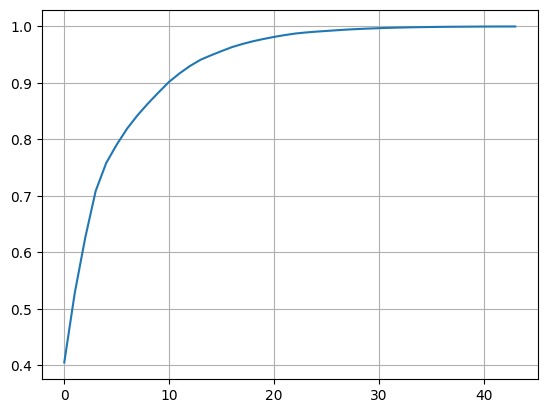

In [17]:
plt.plot(np.cumsum(pca_new.explained_variance_ratio_))
plt.grid()

In [18]:
# Scale numeric columns
numeric_cols = X.select_dtypes(include='number').columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Apply PCA with 15 components
pca = PCA(n_components=11)
X_train_pca_15 = pca.fit_transform(X_train_scaled[numeric_cols])

# Step 3: Create separate PCA DataFrame
pca_columns = [f'PC{i+1}' for i in range(11)]
pca_df = pd.DataFrame(X_train_pca_15, columns=pca_columns, index=X_train.index)

# (Optional) Print explained variance info
print("Explained Variance Ratio (each component):")
print(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance:")
print(np.cumsum(pca.explained_variance_ratio_))


Explained Variance Ratio (each component):
[0.40486663 0.123084   0.09791435 0.08310427 0.04918076 0.03256628
 0.02856805 0.02372215 0.02098873 0.01937033 0.01864061]

Cumulative Explained Variance:
[0.40486663 0.52795064 0.62586498 0.70896925 0.75815002 0.79071629
 0.81928435 0.8430065  0.86399523 0.88336556 0.90200617]


In [19]:
# # Add PC1–PC15 with class labels for color-coded plots
# pca_with_labels = pca_df.copy()
# pca_with_labels['Label'] = y_train.astype(str).values  # Convert y_train to string for color separation

# plt.figure(figsize=(20, 20))
# for i in range(1, 19):
#     plt.subplot(5, 3, i)
#     sns.scatterplot(data=pca_with_labels, x='PC1', y=f'PC{i+1}', hue='Label', palette='tab10', alpha=0.6)
#     plt.title(f'PC1 vs PC{i+1}')
#     plt.legend([],[], frameon=False)  # hide legends for clarity in grid
#     plt.tight_layout()

# plt.suptitle('Bivariate Analysis: PC1 vs Others (Color by Class)', fontsize=18, y=1.02)
# plt.show()

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Make sure `pca_df` and `y_train` are defined
# pca_df_with_label = pca_df.copy()
# pca_df_with_label['Label'] = y_train.astype(str).values

# # Loop over PC1 to PC14, and plot each vs PCi+1 to PC15
# for i in range(10):  # i = 0 to 13 → PC1 to PC14
#     base_pc = f'PC{i+1}'
#     n_plots = 10 - i  # How many subplots per row
#     plt.figure(figsize=(5 * 3, 3 * ((n_plots + 2) // 3)))  # dynamic sizing
    
#     for j in range(i+1,11):  # PC(i+2) to PC15
#         plt.subplot((n_plots + 2) // 3, 3, j - i)
#         compare_pc = f'PC{j+1}'
#         sns.scatterplot(
#             data=pca_df_with_label,
#             x=base_pc, y=compare_pc,
#             hue='Label',
#             palette='tab10',
#             alpha=0.6,
#             legend=False
#         )
#         plt.title(f'{base_pc} vs {compare_pc}')
#         plt.tight_layout()

#     plt.suptitle(f'Bivariate Analysis: {base_pc} vs PC{i+2} to PC6', fontsize=16, y=1.02)
#     plt.show()


In [21]:
# corr_matrix = pca_df.corr()

# # Plot heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5, cbar_kws={'shrink': 0.6})
# plt.title('Correlation Heatmap of Top 15 Principal Components')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

In [22]:
# X_train

In [23]:
# # Assuming both X_train and pca_df have the same index or can be aligned

# # Extract 'SAMPLE ID' from X_train
# sample_id_col = X_train[['Region']]  # Keep as DataFrame
# sample_id_col1 = y_train
# # Extract specific PCs from pca_df
# selected_pcs = pca_df[['PC1', 'PC2','PC3','PC4', 'PC6', 'PC7', 'PC8', 'PC11']]

# # Concatenate them into one DataFrame
# hello_pca = pd.concat([sample_id_col1, sample_id_col,selected_pcs], axis=1)

# # Preview the result
# hello_pca.head()


In [24]:
# import plotly.express as px

# # # Add Sample Origin labels back (you already have y_train, so reattach)
# # X_train_final['Sample Origin'] = y_train.reset_index(drop=True).astype(str)

# # Plot PCA components with labels
# fig = px.scatter(
#     hello_pca,
#     x='PC2',
#     y='PC7',
#     color='Region',
#     title='PCA Visualization of Lunar (L) vs Earth (E) Samples',
#     color_discrete_sequence=px.colors.qualitative.G10,
#     labels={'PC1': 'Principal Component 1', 'PC16': 'Principal Component 16'}
# )

# fig.show()

# OPTIMIZATION AlGORITHM 

In [36]:
Main_df=pca_df
Main_df[['sample', 'Region']] = X_train[['sample', 'Region']]

In [37]:
Main_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,sample,Region
84,-2.055596,-2.692806,-1.486829,-0.466807,2.019755,-0.543745,0.749531,-0.083812,0.816151,-0.660126,-0.222409,Apollo 10142 mare,Mare
95,-1.861277,-1.693318,-2.908595,-1.453686,1.775243,0.797594,0.273638,-2.498477,-3.684719,6.399984,2.240042,Apollo 10153 mare,Mare
137,-1.295825,0.432565,-1.817624,0.513065,0.234059,-0.428624,-0.014749,0.036738,-0.026142,-0.069118,0.020751,Apollo 10195mare,Mare
211,-5.576996,-1.114967,2.148502,0.001623,-1.236102,-0.043901,-0.373524,0.182681,-0.038334,-0.853289,1.113151,14260-7.2<10um highland,Highland
86,-3.962161,-2.716622,-0.270814,-2.133672,1.741623,0.963102,-0.043511,-0.504605,-0.221582,-0.729139,0.106861,Apollo 10144 mare,Mare


# OPTIMIZATION ALGO Formula 1

In [45]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# -------------------------------
# Example dataset (replace with your actual file read)
# -------------------------------
# Main_df = pd.read_excel("your_file.xlsx")  

# Columns for PCA
pca_cols = [f"PC{i}" for i in range(1, 12)]

# -------------------------------
# Separate Lunar and Earth samples
# -------------------------------
lunar_df = Main_df[Main_df["Region"].isin(["Mare", "Highland"])].reset_index(drop=True)
earth_df = Main_df[Main_df["Region"] == 0].reset_index(drop=True)   # <-- ensure Earth rows are labeled "Earth"

# -------------------------------
# Optimization function
# -------------------------------
def optimize_for_lunar(L, E):
    n = E.shape[0]  # number of Earth materials

    def objective(weights):
        pred = np.dot(weights, E)   # weighted Earth PCA coords
        return np.sum((pred - L) ** 2)  # squared error

    constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
    bounds = [(0, 1)] * n
    initial_weights = np.ones(n) / n

    result = minimize(objective, initial_weights, method='SLSQP',
                      bounds=bounds, constraints=constraints)
    
    return result.x if result.success else np.zeros(n)

# -------------------------------
# Run optimization for each lunar sample
# -------------------------------
all_results = []

for idx, row in lunar_df.iterrows():
    lunar_name = row["sample"]
    L = row[pca_cols].values                # Lunar PCA vector
    E = earth_df[pca_cols].values           # Earth PCA matrix

    weights = optimize_for_lunar(L, E)

    df_out = pd.DataFrame({
        "Lunar_Sample": lunar_name,
        "Earth_Index": earth_df.index,
        "Earth_Sample": earth_df["sample"].values,
        "Weight": weights
    })
    
    all_results.append(df_out)

# Combine all results
final_results = pd.concat(all_results, ignore_index=True)

# -------------------------------
# Save to Excel (optional)
# -------------------------------
# final_results.to_excel("Optimized_Weights_All_Lunar_Samples.xlsx", index=False)

print("✅ Optimization done for all lunar samples!")
final_results.head()


✅ Optimization done for all lunar samples!


,Lunar_Sample,Earth_Index,Earth_Sample,Weight
0,Apollo 10142 mare,0,ILM-POLIM,0.000000e+00
1,Apollo 10142 mare,1,BAZ-KAY,1.000000e+00
2,Apollo 10142 mare,2,BAZ-ERAYc,9.342201e-10
3,Apollo 10153 mare,0,ILM-POLIM,2.550628e-09
4,Apollo 10153 mare,1,BAZ-KAY,1.000000e+00


# OPTIMIZATION ALGO Formula 2

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.optimize import minimize

# -------------------------------
# Parameters
# -------------------------------
pca_cols = [f"PC{i}" for i in range(1, 12)]
n_clusters = 5  # You can choose the number of lunar clusters

# -------------------------------
# Separate Lunar and Earth samples
# -------------------------------
lunar_df = Main_df[Main_df["Region"].isin(["Mare", "Highland"])].reset_index(drop=True)
earth_df = Main_df[Main_df["Region"] == 0].reset_index(drop=True)

# -------------------------------
# Step 1: Cluster Lunar Samples using KMeans
# -------------------------------
# lunar_means = lunar_df.groupby("Region")[pca_cols].mean().reset_index()
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
lunar_df["Cluster"] = kmeans.fit_predict(lunar_df[pca_cols])

# Get centroids (these become our target compositions)
lunar_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pca_cols)
lunar_centroids["Cluster"] = range(n_clusters)

# -------------------------------
# Step 2: Optimization Function
# -------------------------------
def optimize_for_target(target_coords, earth_coords):
    n = earth_coords.shape[0]

    def objective(weights):
        pred_coords = np.dot(weights, earth_coords)
        return np.sum((pred_coords - target_coords) ** 2)

    constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
    bounds = [(0, 1)] * n
    initial_weights = np.ones(n) / n

    result = minimize(objective, initial_weights, method='SLSQP',
                      bounds=bounds, constraints=constraints)

    if result.success:
        return result.x
    else:
        return np.zeros(n)

# -------------------------------
# Step 3: Run Optimization for Each Cluster Centroid
# -------------------------------
all_results = []

for idx, row in lunar_centroids.iterrows():
    cluster_id = row["Cluster"]
    target_coords = row[pca_cols].values
    earth_coords = earth_df[pca_cols].values

    weights = optimize_for_target(target_coords, earth_coords)

    df_out = pd.DataFrame({
        "Cluster": cluster_id,
        "Earth_Index": earth_df.index,
        "Earth_Sample": earth_df["sample"].values,
        "Weight": weights
    })

    all_results.append(df_out)

# -------------------------------
# Step 4: Combine and Save
# -------------------------------
final_results = pd.concat(all_results, ignore_index=True)
# final_results.to_excel("Optimized_Weights_KMeans_Clusters.xlsx", index=False)

print(" Optimization completed for all KMeans clusters!")
final_results


 Optimization completed for all KMeans clusters!


,Cluster,Earth_Index,Earth_Sample,Weight
0,0.0,0,ILM-POLIM,0.000000e+00
1,0.0,1,BAZ-KAY,1.000000e+00
2,0.0,2,BAZ-ERAYc,1.011772e-09
3,1.0,0,ILM-POLIM,0.000000e+00
4,1.0,1,BAZ-KAY,1.000000e+00
5,1.0,2,BAZ-ERAYc,8.961742e-11
6,2.0,0,ILM-POLIM,0.000000e+00
7,2.0,1,BAZ-KAY,1.000000e+00
8,2.0,2,BAZ-ERAYc,3.345563e-10
9,3.0,0,ILM-POLIM,9.133004e-16


In [30]:
# final_results.to_excel("Optimal_ratio_turkey_without_KNN_imputation.xlsx", index=False)